#### Load Dataset (Fashion MNIST)

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4422102/4422102 [==============================] - 1s 0us/step


#### View Fashion MNIST Images

Enter image index (e.g. 0 to 59999): 6000


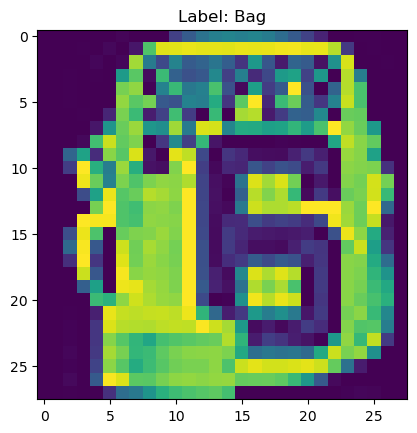

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# View a sample image
index = int(input("Enter image index (e.g. 0 to 59999): "))  
plt.imshow(x_train[index])
plt.title(f"Label: {class_names[y_train[index]]}")
plt.axis('on')
plt.show()


In [16]:
import numpy as np
import gzip
import os

# Set your folder path
folder = r'C:/Users/atiyv/OneDrive/Desktop/FashionMNIST'

# Functions to load the data
def load_images(filename):
    with gzip.open(os.path.join(folder, filename), 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
        return data.reshape(-1, 28, 28)

def load_labels(filename):
    with gzip.open(os.path.join(folder, filename), 'rb') as f:
        return np.frombuffer(f.read(), np.uint8, offset=8)

# Load data
x_train = load_images('train-images-idx3-ubyte.gz')
y_train = load_labels('train-labels-idx1-ubyte.gz')
x_test = load_images('t10k-images-idx3-ubyte.gz')
y_test = load_labels('t10k-labels-idx1-ubyte.gz')

print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


In [18]:
import numpy as np
import gzip
import os
import matplotlib.pyplot as plt

# Folder path
folder = r'C:/Users/atiyv/OneDrive/Desktop/FashionMNIST'

# Label names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Functions to load data
def load_images(filename):
    with gzip.open(os.path.join(folder, filename), 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
        return data.reshape(-1, 28, 28)

def load_labels(filename):
    with gzip.open(os.path.join(folder, filename), 'rb') as f:
        return np.frombuffer(f.read(), np.uint8, offset=8)

# Load dataset
x_train = load_images('train-images-idx3-ubyte.gz')
y_train = load_labels('train-labels-idx1-ubyte.gz')
x_test = load_images('t10k-images-idx3-ubyte.gz')
y_test = load_labels('t10k-labels-idx1-ubyte.gz')

# Show dataset size
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {x_test.shape}, Labels: {y_test.shape}")


Training set: (60000, 28, 28), Labels: (60000,)
Test set: (10000, 28, 28), Labels: (10000,)


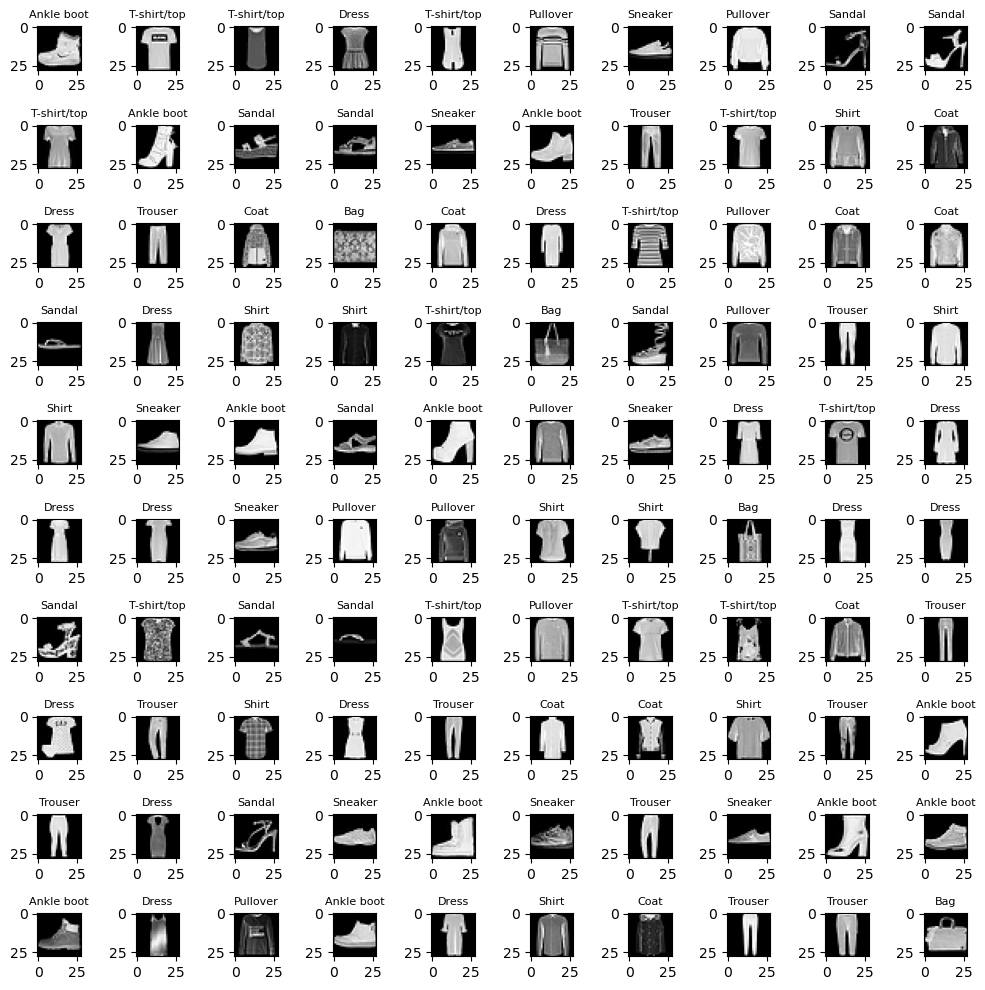

In [23]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=8)
    plt.axis('on')
plt.tight_layout()
plt.show()


#### Deep Learning Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=5, validation_data=(x_test, y_test_cat))


Epoch 1/5
1875/1875 [==============================] - 28s 14ms/step - loss: 0.6117 - accuracy: 0.8319 - val_loss: 0.3813 - val_accuracy: 0.8616
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3238 - accuracy: 0.8814 - val_loss: 0.3436 - val_accuracy: 0.8744
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2808 - accuracy: 0.8965 - val_loss: 0.3296 - val_accuracy: 0.8815
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2647 - accuracy: 0.9012 - val_loss: 0.3444 - val_accuracy: 0.8787
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2401 - accuracy: 0.9107 - val_loss: 0.3368 - val_accuracy: 0.8856


#### Classification Function for Recommendation

In [8]:
import numpy as np

def classify_fashion_item(img):
    img = img.reshape(1, 28, 28, 1)
    pred = model.predict(img)
    label_index = np.argmax(pred)
    return labels[label_index]

def recommend_similar_items(img, num_recommendations=5):
    predicted_label = classify_fashion_item(img)
    print(f"Predicted Category: {predicted_label}")
    
    matching_indices = [i for i in range(len(y_train)) if labels[y_train[i]] == predicted_label]
    
    # Just return the first few matches
    recommended_imgs = [x_train[i].reshape(28, 28) for i in matching_indices[:num_recommendations]]
    return recommended_imgs


#### Command Line Interface

Enter test image index (0-9999) or -1 to quit: 9000


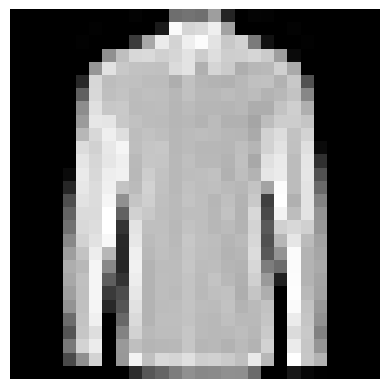

1/1 [==============================] - 0s 124ms/step
Predicted: Shirt
1/1 [==============================] - 0s 18ms/step
Predicted Category: Shirt
Recommended Items:


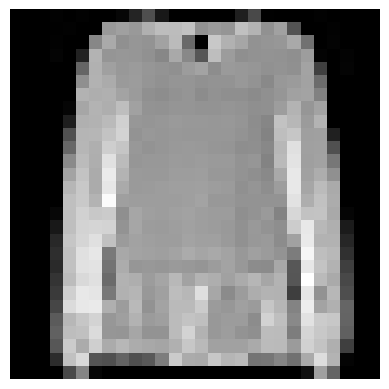

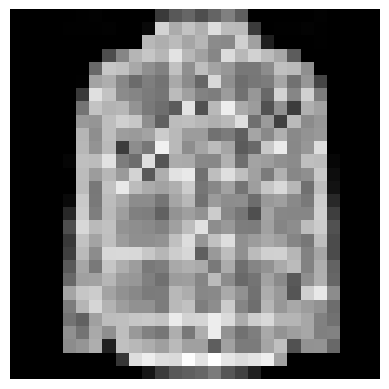

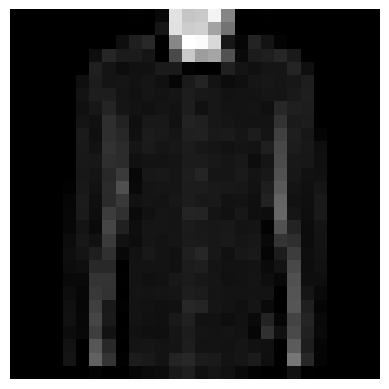

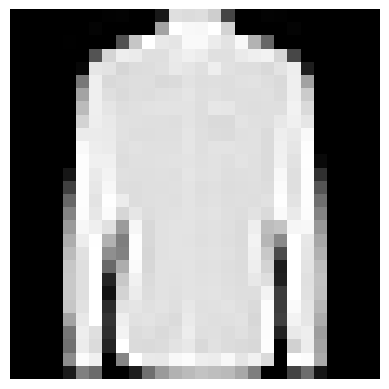

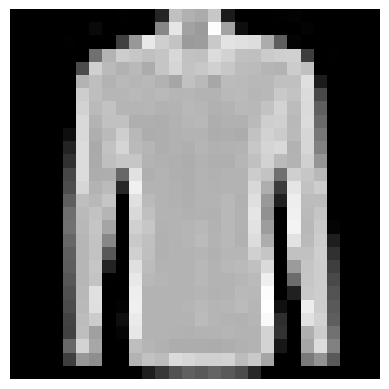

Enter test image index (0-9999) or -1 to quit: 900


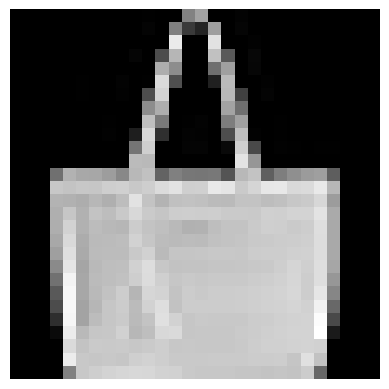

1/1 [==============================] - 0s 17ms/step
Predicted: Bag
1/1 [==============================] - 0s 18ms/step
Predicted Category: Bag
Recommended Items:


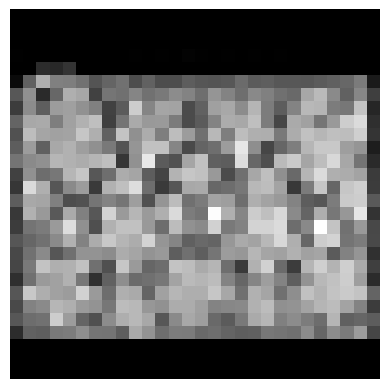

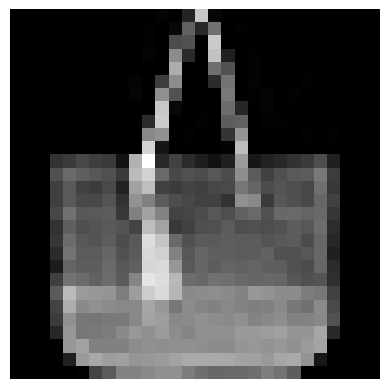

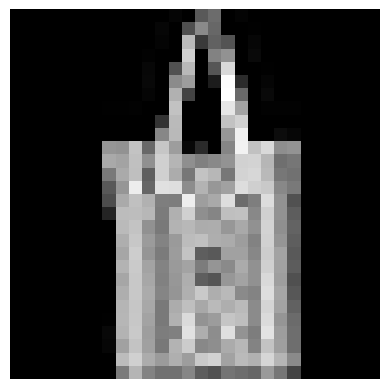

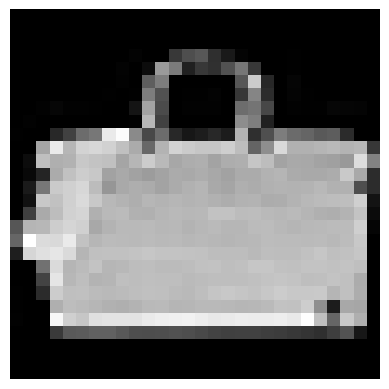

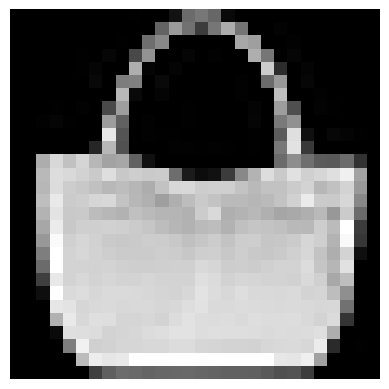

Enter test image index (0-9999) or -1 to quit: -1


In [9]:
import matplotlib.pyplot as plt

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

def run_cli():
    while True:
        idx = int(input("Enter test image index (0-9999) or -1 to quit: "))
        if idx == -1:
            break
        test_img = x_test[idx]
        show_image(test_img.squeeze())

        pred = classify_fashion_item(test_img)
        print(f"Predicted: {pred}")
        
        recs = recommend_similar_items(test_img)
        print("Recommended Items:")
        for rec_img in recs:
            show_image(rec_img)

run_cli()


#### EVALUATION

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [26]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train_cat, epochs=5, validation_split=0.1)

# --- Evaluate on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

Epoch 1/5
1688/1688 [==============================] - 6s 3ms/step - loss: 1.1319 - accuracy: 0.6496 - val_loss: 0.7197 - val_accuracy: 0.7428
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6551 - accuracy: 0.7650 - val_loss: 0.5962 - val_accuracy: 0.7798
Epoch 3/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5767 - accuracy: 0.7923 - val_loss: 0.5468 - val_accuracy: 0.8058
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5326 - accuracy: 0.8111 - val_loss: 0.5093 - val_accuracy: 0.8183
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


In [28]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f" Accuracy: {acc:.4f}")


 Accuracy: 0.8139


In [29]:
# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f" F1 Score (weighted): {f1:.4f}")

 F1 Score (weighted): 0.8116


In [30]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1000
           1       0.97      0.95      0.96      1000
           2       0.75      0.64      0.69      1000
           3       0.81      0.83      0.82      1000
           4       0.64      0.82      0.71      1000
           5       0.91      0.90      0.90      1000
           6       0.56      0.46      0.50      1000
           7       0.88      0.89      0.89      1000
           8       0.93      0.94      0.94      1000
           9       0.91      0.92      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



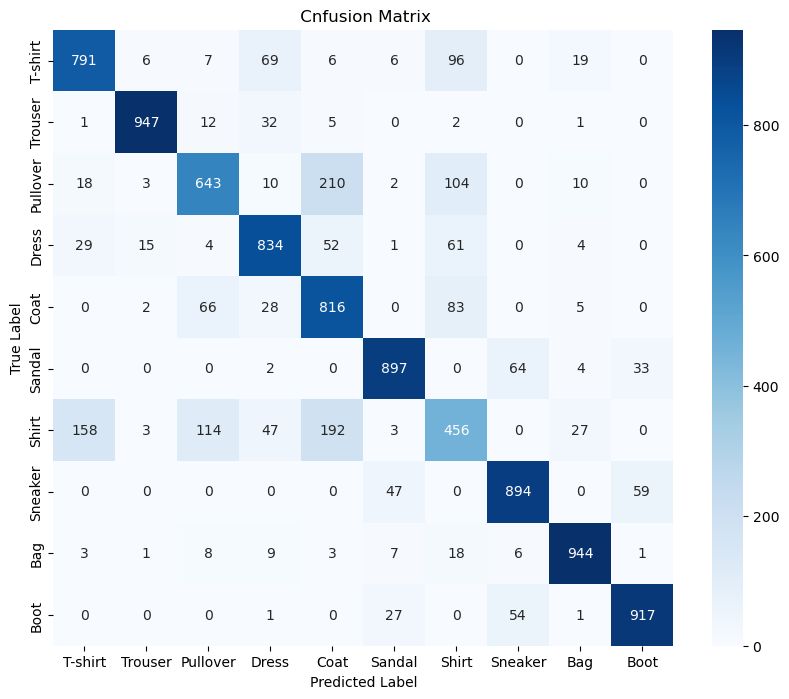

In [32]:
# --- Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
    'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot'
], yticklabels=[
    'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot'
])
plt.title(" Cnfusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

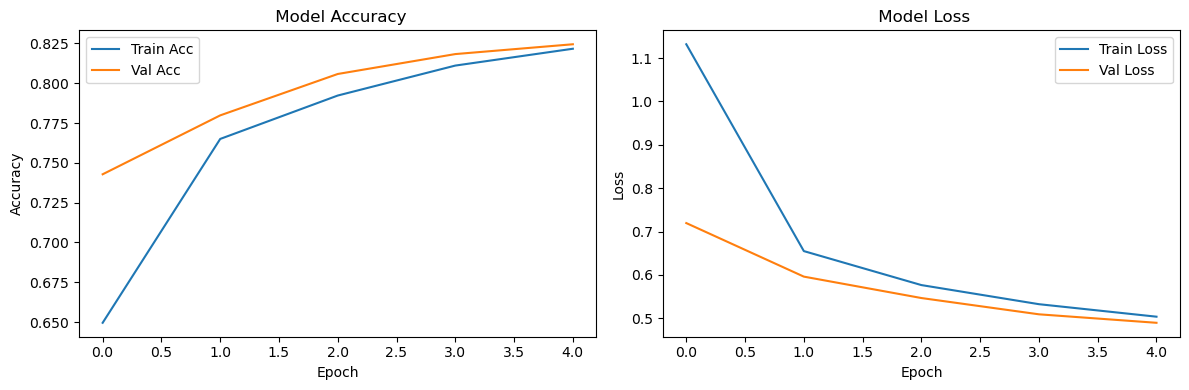

In [33]:
#  Accuracy & loss plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title(" Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(" Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
